# Y a-t-il un lien entre le jour de la semaine et le nombre d'accidents routiers?
La ville de Montréal offre une base de données libre d'accès contenant l'ensemble des collisions routières rapportées par la police sur son territoire depuis 2012.

In [1]:
# Importer les modules
import pandas
import matplotlib.pyplot as plt

In [2]:
# Ouvrir le fichier csv
dataset = pandas.read_csv("collisions_routieres.csv", delimiter=",", parse_dates=["DT_ACCDN"])
dataset.head(5)

,NO_SEQ_COLL,JR_SEMN_ACCDN,DT_ACCDN,CD_MUNCP,NO_CIVIQ_ACCDN,SFX_NO_CIVIQ_ACCDN,BORNE_KM_ACCDN,RUE_ACCDN,TP_REPRR_ACCDN,ACCDN_PRES_DE,...,NB_VICTIMES_VELO,VITESSE_AUTOR,LOC_X,LOC_Y,LOC_COTE_QD,LOC_COTE_PD,LOC_DETACHEE,LOC_IMPRECISION,LOC_LAT,LOC_LONG
0,SPVM _ 2012 _ 1,ME,2012-02-01,66102.0,3501.0,NaN,NaN,ST CHARLES,2.0,STAT,...,0,NaN,276517.37950,5.035127e+06,A,3,O,N,45.45550,-73.86162
1,SPVM _ 2012 _ 2,SA,2012-06-02,66023.0,NaN,NaN,NaN,NaN,NaN,COTE VERTU ET AUT 40,...,0,NaN,287913.26000,5.038666e+06,A,3,N,O,45.48772,-73.71603
2,SPVM _ 2012 _ 3,JE,2012-06-28,66023.0,NaN,NaN,NaN,COTE VERTU,1.0,DECARIE,...,0,50.0,290518.82501,5.041617e+06,A,1,N,N,45.51432,-73.68279
3,SPVM _ 2012 _ 4,ME,2012-07-11,66023.0,NaN,NaN,NaN,ST MATHIEU,1.0,RENE LEVESQUE,...,0,50.0,298822.88600,5.039146e+06,A,3,N,N,45.49221,-73.57647
4,SPVM _ 2012 _ 5,LU,2012-01-02,66023.0,4849.0,NaN,NaN,ST JEAN,NaN,NaN,...,0,NaN,277433.35738,5.038881e+06,A,1,O,N,45.48932,-73.85011


## Préparation des données

La majorité des colonnes du dataset ne nous intéresse pas. Nous allons uniquement garder les colonnes de date et de jour de la semaine.

De plus, nous nous intéressons uniquement aux accidents ayant une gravité autre que "dommages matériels inférieurs au seuil de rapportage", étant donné qu'ils ne sont pas inclus dans le bilan routier.

In [3]:
filtered_data = dataset.loc[dataset["GRAVITE"] != "Dommages matériels inférieurs au seuil de rapportage", ["DT_ACCDN", "JR_SEMN_ACCDN"]]
filtered_data.head(5)

,DT_ACCDN,JR_SEMN_ACCDN
1,2012-06-02,SA
4,2012-01-02,LU
5,2012-01-02,LU
6,2012-01-03,MA
7,2012-01-02,LU


Le dataset est beaucoup mieux. Nous allons toutefois modifier le nom des colonnes pour qu'elles soient davantage significatives.

In [4]:
filtered_data.columns = ["Date", "Jour_de_la_semaine"]
filtered_data.head(5)

,Date,Jour_de_la_semaine
1,2012-06-02,SA
4,2012-01-02,LU
5,2012-01-02,LU
6,2012-01-03,MA
7,2012-01-02,LU


Maintenant que le dataset est prêt, nous allons calculer le nombre total d'accidents par jour, selon le jour de la semaine.

In [5]:
total_accidents_per_weekday = filtered_data.groupby(filtered_data["Jour_de_la_semaine"]).size()
total_accidents_per_weekday

Jour_de_la_semaine
DI    12660
JE    17683
LU    15500
MA    16555
ME    16840
SA    14913
VE    18101
dtype: int64

On commence déjà à voir une variation dans le nombre d'accidents selon le jour de la semaine.
Or, ces données ne parlent pas suffisamment aux gens. Nous allons donc plutôt calculer le nombre moyen d'accidents par jour de la semaine.

In [6]:
# Calculer le nombre d'occurence des jours de la semaine dans le fichier csv
count_of_weekday = filtered_data.groupby(filtered_data["Jour_de_la_semaine"]).Date.nunique()

# Calculer le nombre d'accident moyen par jours de la semaine
average_accidents_per_weekday = total_accidents_per_weekday.divide(count_of_weekday)

# Transformer le résultat en dataframe
dataframe_average_accidents_per_weekday = average_accidents_per_weekday.reset_index(name='Nombre_accidents')
dataframe_average_accidents_per_weekday

,Jour_de_la_semaine,Nombre_accidents
0,DI,30.287081
1,JE,42.405276
2,LU,37.081340
3,MA,39.605263
4,ME,40.383693
5,SA,35.762590
6,VE,43.407674


Ces chiffres sont beaucoup plus significatifs et soulèvent davantage les écarts entre chaque jour de la semaine.

Les jours de la semaine sont toutefois désordonnés. Nous allons donc trier les lignes du dataframe pour les mettre en ordre.

In [7]:
# Établir l'ordre souhaité
day_order = ["DI", "LU", "MA", "ME", "JE", "VE", "SA"]

# Changer l'ordre des lignes selon l'ordre établit
dataframe_average_accidents_per_weekday["Jour_de_la_semaine"] = pandas.Categorical(dataframe_average_accidents_per_weekday["Jour_de_la_semaine"], day_order)
sorted_average_accidents_per_weekday = dataframe_average_accidents_per_weekday.sort_values("Jour_de_la_semaine").set_index("Jour_de_la_semaine")
sorted_average_accidents_per_weekday

,Nombre_accidents
Jour_de_la_semaine,
DI,30.287081
LU,37.081340
MA,39.605263
ME,40.383693
JE,42.405276
VE,43.407674
SA,35.762590


Les abréviations pour les jours de la semaine sont suffisantes pour l'affichage dans un tableau.
Or, pour faire des analyses il serait bénéfique d'avoir l'option d'afficher le nom complet du jour de la semaine.

In [8]:
renamed_average_accidents_per_weekday = average_accidents_per_weekday.rename({"DI": "Dimanche", "LU": "Lundi", "MA": "Mardi", "ME": "Mercredi", "JE": "Jeudi", "VE": "Vendredi", "SA": "Samedi"})

## Statistiques
Nous sommes maintenant prêt à calculer des statistiques, afin de relever les écarts entre le nombre d'accidents moyen par jour pour chaque jour de la semaine.

In [9]:
# Calcul de l'écart-type
ecart_type = average_accidents_per_weekday.std()

# Calcul de la moyenne
moyenne = average_accidents_per_weekday.mean()

# Calcul de la valeur minimale et de la journée y correspondant
valeur_min = average_accidents_per_weekday.min()
jour_min = renamed_average_accidents_per_weekday.idxmin()

# Calcul de la valeur maximale et de la journée y correspondant
valeur_max = average_accidents_per_weekday.max()
jour_max = renamed_average_accidents_per_weekday.idxmax()

# Calcul de l'écart entre la valeur maximale et minimale, en nombre d'accidents et en pourcentage
ecart_min_max = valeur_max - valeur_min
ecart_min_max_pourcentage = (ecart_min_max / valeur_min) * 100

# Impression des statistiques
print("La journée avec le moins de collisions routières par jour est le", jour_min.lower(), "avec", round(valeur_min, 2), "collisions",
      "\n" "La journée avec le plus de collisions routières par jour est le", jour_max.lower(), "avec", round(valeur_max, 2), "collisions",
      "\n" "Le", jour_max.lower(), "a", round(ecart_min_max_pourcentage, 2), "% plus de collisions par jour que", jour_min.lower(), ", soit un écart de", round(ecart_min_max, 2), "collisions par jour",
      "\n" "La moyenne est de", round(moyenne, 2), "collisions par jour",
      "\n" "L'écart type est de", round(ecart_type, 2), "collisions par jour")

La journée avec le moins de collisions routières par jour est le dimanche avec 30.29 collisions 
La journée avec le plus de collisions routières par jour est le vendredi avec 43.41 collisions 
Le vendredi a 43.32 % plus de collisions par jour que dimanche , soit un écart de 13.12 collisions par jour 
La moyenne est de 38.42 collisions par jour 
L'écart type est de 4.49 collisions par jour


## Graphique
Afin de mieux relever les écarts entre le nombre d'accidents moyen quotidien pour chaque jour de la semaine, nous allons afficher les résultats sous la forme d'un graphique à barres.

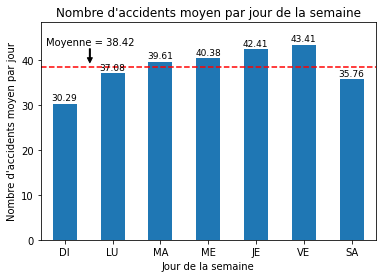

In [10]:
sorted_average_accidents_per_weekday.plot(kind="bar", legend=False)

# Déclarer le nom des axes et le titre du graphique
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre d'accidents moyen par jour")
plt.title("Nombre d'accidents moyen par jour de la semaine")

# Modifier la rotation des valeurs de l'axe des x
plt.xticks(rotation="0")

# Modifier la taille de l'axe des y
plt.gca().set_ylim([0,valeur_max+5])

# Pour afficher les valeurs pour chaque jour de la semaine :
# Créer une variable déclarant la position des étiquettes de données. L'intitier à -0.275, soit la position sur l'axe des x de la première colonne du tableau
position_index = -0.275
# Pour toutes les valeurs du dataframe
for value in sorted_average_accidents_per_weekday["Nombre_accidents"]:
    # Écrire la valeur dans le graphique
    plt.text(position_index, value+0.75, str(round(value, 2)), color="black", size=9)
    # Incrémenter l'index de positionnement, pour écrire la prochaine valeur au dessus de la colonne correspondante
    position_index += 1

# Afficher une ligne montrant la moyenne et annoter le graphique pour expliquer ce que représente la ligne
plt.axhline(moyenne, color="red", linestyle="--")
plt.annotate("Moyenne = %s" % round(moyenne, 2), xy=(0.525, moyenne+1), xytext=(-0.4, moyenne+5), arrowprops=dict(width=1, color="black", headwidth=5, headlength=5))
plt.show()

## Conclusion
L'analyse effectuée entre le nombre moyen d'accidents par jour et les jours de la semaine démontre qu'il y a de plus en plus de collisions routières au fur et à mesure que la semaine avance, suivi par une importante diminution lors de la fin de semaine.

À partir de ces informations, voici nos principales recommandations pour la ville de Montréal :
- Pousser l'analyser afin de déterminer les causes principales de cette variation dans le nombre de collisions routières
- Établir un plan d'action pour mieux prévenir les accidents lors des journées à risque
- Répartir les ressources d'urgence dans la semaine afin d'avoir davantage d'ambulanciers et de policiers disponibles lors des journées à risque